# 第11讲 可视化(Visualization)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 11.1 plot

- 语法

```python
>>>  plt.plot()
```

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',periods=1000))
ts

2000-01-01   -0.040286
2000-01-02    0.191090
2000-01-03   -0.486028
2000-01-04   -0.940423
2000-01-05   -0.958556
                ...   
2002-09-22    1.465034
2002-09-23   -0.872169
2002-09-24    0.313181
2002-09-25    0.425797
2002-09-26    0.712418
Freq: D, Length: 1000, dtype: float64

In [3]:
ts = ts.cumsum()
ts

2000-01-01    -0.040286
2000-01-02     0.150804
2000-01-03    -0.335223
2000-01-04    -1.275646
2000-01-05    -2.234202
                ...    
2002-09-22    42.674462
2002-09-23    41.802294
2002-09-24    42.115474
2002-09-25    42.541271
2002-09-26    43.253689
Freq: D, Length: 1000, dtype: float64

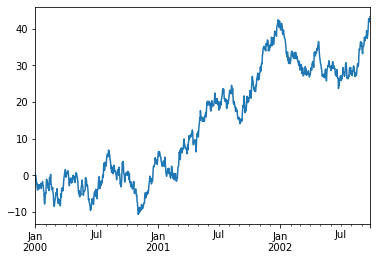

In [4]:
ts.plot()

if the index consists of dates, it calls gcf().autofmt_xdate() to try to format the x-axis nicely as per above.   
On DataFrame, plot() is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

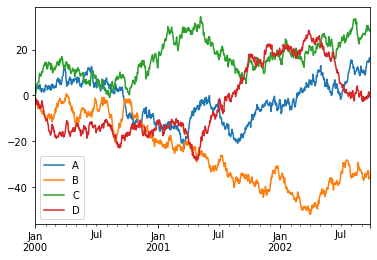

In [5]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure()
df.plot()

You can plot one column versus another using the x and y keywords in plot():

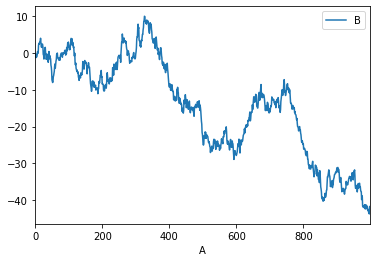

In [6]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

## 11.2 其他绘图方法：kind 关键字

- ‘bar’ or ‘barh’ for bar plots  
- ‘hist’ for histogram  
- ‘box’ for boxplot
- ‘kde’ or ‘density’ for density plots • ‘area’ for area plots  
- ‘scatter’ for scatter plots  
- ‘hexbin’ for hexagonal bin plots  
- ‘pie’ for pie plots  
-   


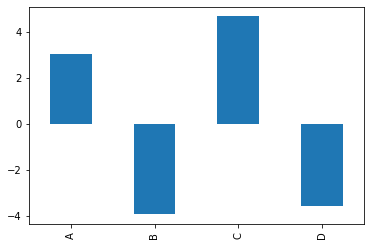

In [7]:
plt.figure();
df.iloc[5].plot(kind='bar');

In [8]:
df.iloc[5]

A    3.024358
B   -3.936333
C    4.659664
D   -3.571807
Name: 2000-01-06 00:00:00, dtype: float64

-  DataFrame.plot.<kind>替代

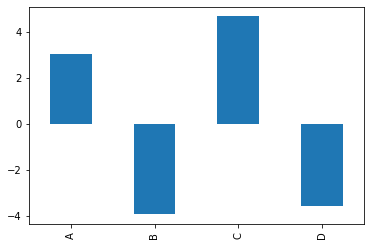

In [9]:
df.iloc[5].plot.bar()

In addition to these kind s, there are the `DataFrame.hist()`, and `DataFrame.boxplot()` methods, which use a separate interface.   
Finally, there are several plotting functions in `pandas.plotting` that take a Series or DataFrame as an argument. These include:  
- Scatter Matrix
- Andrews Curves
- Parallel Coordinates
- Lag Plot
- Autocorrelation Plot
- Bootstrap Plot
- RadViz

### 11.2.1 Bar

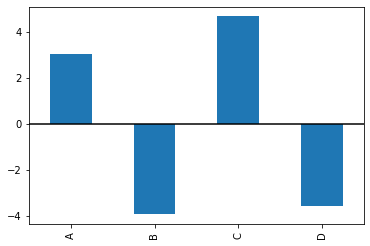

In [10]:
plt.figure();
df.iloc[5].plot.bar(); 
plt.axhline(0, color='k')

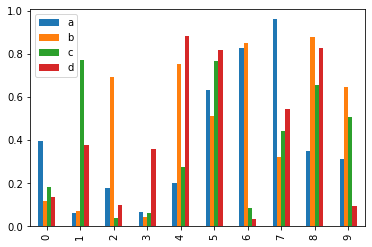

In [11]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar();

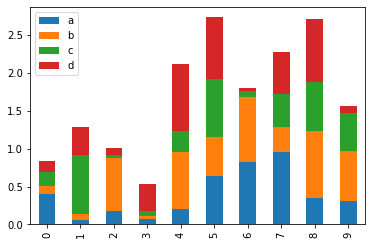

In [12]:
df2.plot.bar(stacked=True)

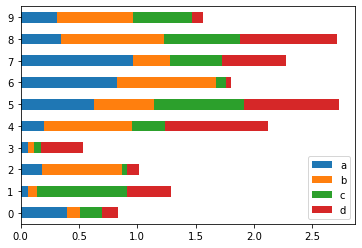

In [13]:
df2.plot.barh(stacked=True);

### 11.2.2 Histograms

In [14]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4

,a,b,c
0,0.674274,0.659331,-2.038021
1,2.921123,-0.349975,-1.087765
2,1.686031,-0.400311,-1.286967
3,-0.672128,0.888251,-1.334970
4,-0.597784,-2.016763,-1.774223
...,...,...,...
995,0.484868,0.000194,-0.176592
996,1.588430,-1.870432,0.879060
997,0.004093,-1.605973,-0.894352
998,0.688527,-1.085943,0.711068


<Figure size 432x288 with 0 Axes>

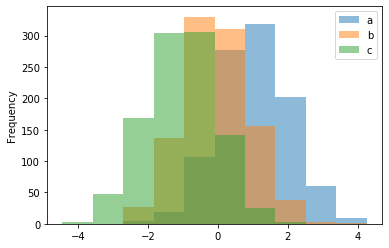

In [15]:
plt.figure();
df4.plot.hist(alpha=0.5)

<Figure size 432x288 with 0 Axes>

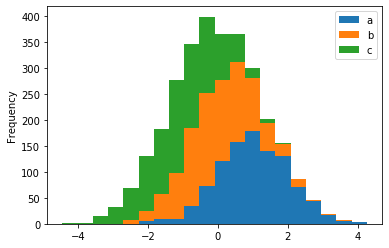

In [16]:
plt.figure();
df4.plot.hist(stacked=True, bins=20)

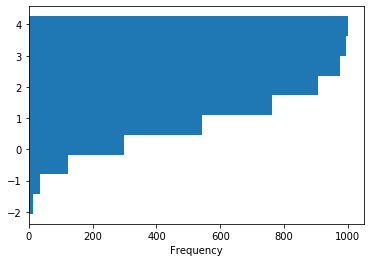

In [17]:
plt.figure();
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

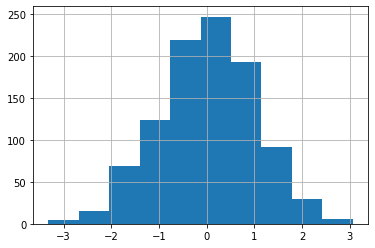

In [18]:
plt.figure();
df['A'].diff().hist()

DataFrame.hist() plots the histograms of the columns on multiple subplots:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214365D52C8>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

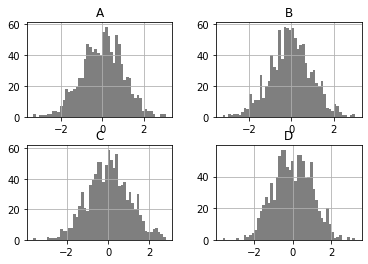

In [19]:
plt.figure()
df.diff().hist(color='k', alpha=0.5, bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214366A6BC8>,
      dtype=object)

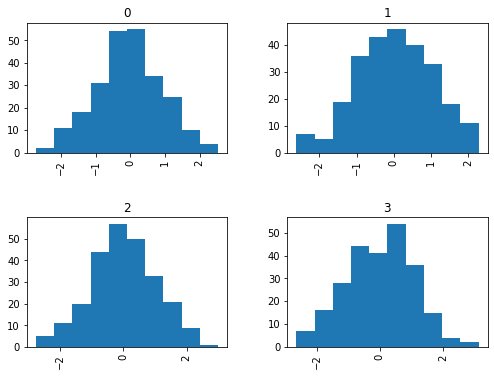

In [20]:
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0, 4, 1000), figsize=(8, 6))  

### 11.2.3 Box Plots

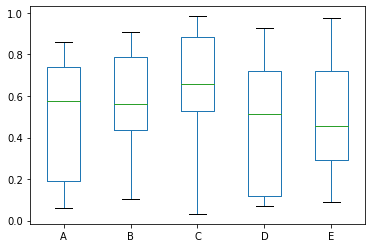

In [21]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box() #箱型图包含一组数据：中位数、上四分位数、下四分位数、内限、外限、异常值

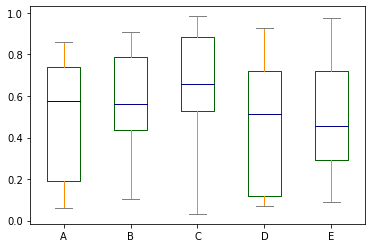

In [22]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df.plot.box(color=color, sym='r+')

### 11.2.4 Area Plot

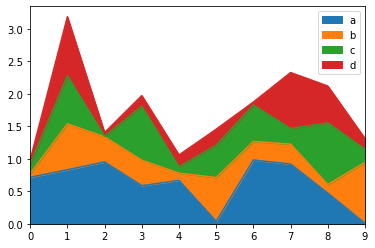

In [23]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area();

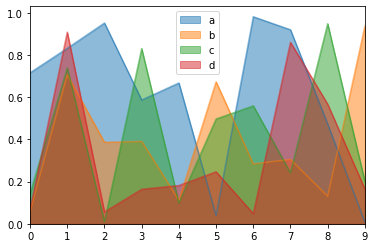

In [24]:
 df.plot.area(stacked=False);

### 11.2.5 Scatter Plot

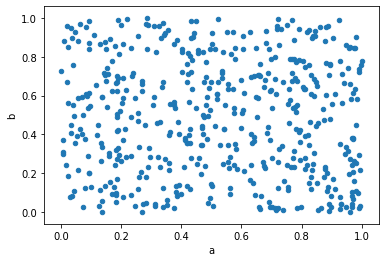

In [25]:
df = pd.DataFrame(np.random.rand(500, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

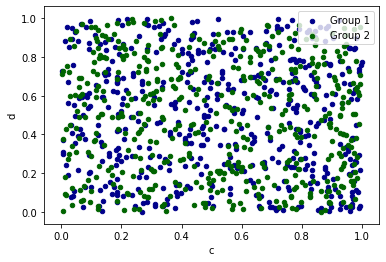

In [26]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

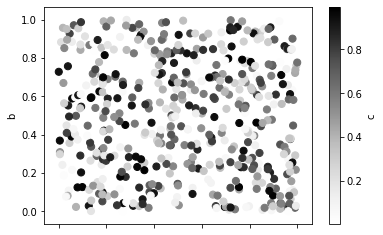

In [27]:
 df.plot.scatter(x='a', y='b', c='c', s=50);

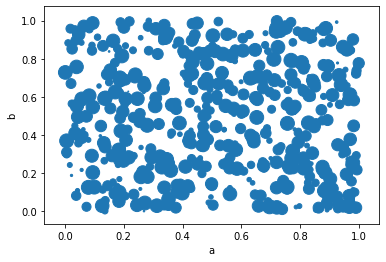

In [28]:
 df.plot.scatter(x='a', y='b', s=df['c']*200);

### 11.2.6 Hexagonal Bin Plot

Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.   
如果您的数据过于密集，无法单独绘制每个点，则Hexbin图可以作为散点图的有用替代方案。

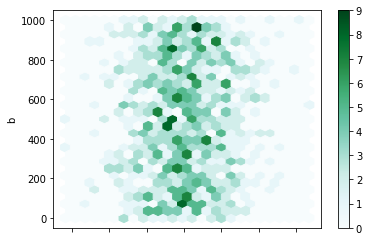

In [29]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot.hexbin(x='a', y='b', gridsize=25)

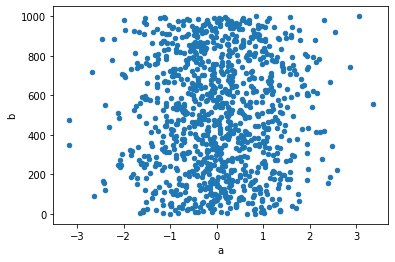

In [30]:
df.plot.scatter(x='a', y='b');

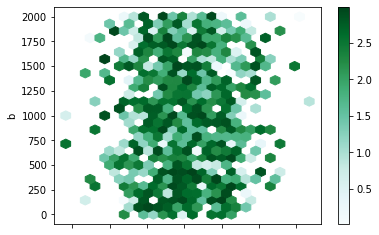

In [31]:
#df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max,gridsize=25)

### 11.2.7 Pie plot

In [32]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series

a    1.185294
b    2.901523
c    2.531111
d    1.561291
Name: series, dtype: float64

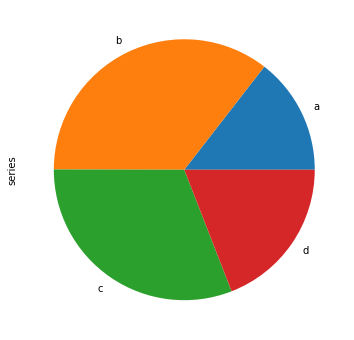

In [33]:
series.plot.pie(figsize=(6, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021436EFB348>,
      dtype=object)

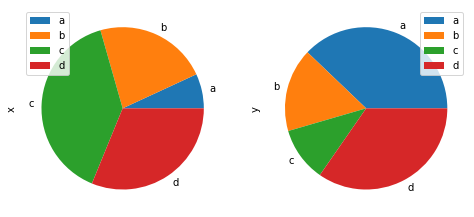

In [34]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(8, 4))

## 11.3 Plotting Tools


 ### 11.3.1 Scatter Matrix Plot

In [35]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-0.778833,1.101494,-1.005837,-1.564265
1,1.070920,-1.126910,0.733244,-0.450113
2,1.424051,0.392855,0.525046,-0.840777
3,0.726936,-2.230680,0.562712,0.667863
4,0.517575,-0.170128,1.991234,1.612445
...,...,...,...,...
995,0.555048,0.230437,-0.641048,0.078421
996,-1.470828,-0.651475,-0.321792,-0.920030
997,0.956180,-0.387751,0.032022,-2.052883
998,1.277339,1.081980,-0.657287,2.864346


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021437F8A0C8>,
      dtype=object)

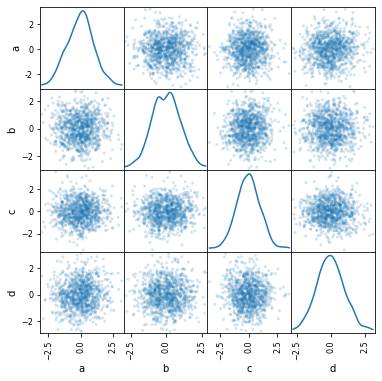

In [36]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

 ### 11.3.2 Density Plot

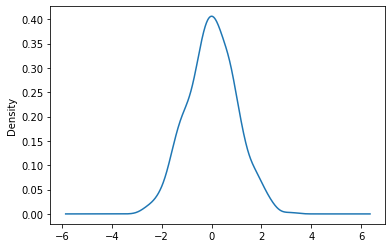

In [37]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()


 ### 11.3.3 Lag Plot
 - Lag plots are used to check if a data set or time series is random

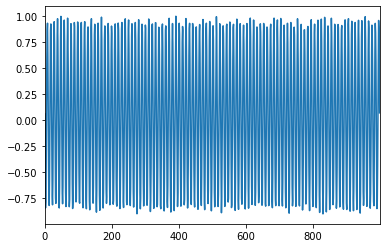

In [38]:
from pandas.plotting import lag_plot
plt.figure()
data = pd.Series(0.1 * np.random.rand(1000) +0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000))
                +0 * np.sin(2*np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
data.plot()

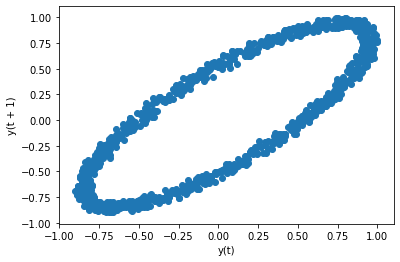

In [39]:
lag_plot(data)

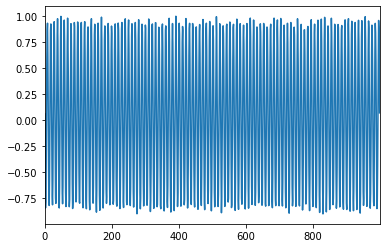

In [40]:
data.plot()

 ### 11.3.4 Autocorrelation Plot

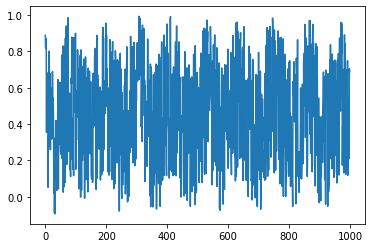

In [41]:
from pandas.plotting import autocorrelation_plot
plt.figure()
data = pd.Series(0.9 * np.random.rand(1000) + 0.1 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
plt.plot(data)

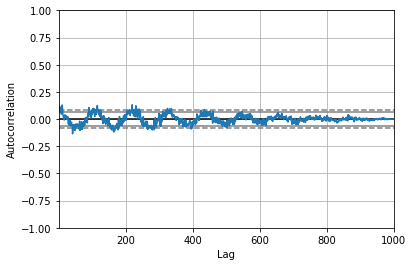

In [42]:
autocorrelation_plot(data)

 ### 11.3.3 RadViz(径向坐标可视化)
 - RadViz is a way of visualizing multi-variate data.
 - 可视化原理是将一系列多维空间的点通过非线性方法映射到二维空间的可视化技术,是基于圆形平行坐标系的设计思想而提出的多维可视化方法
 - 径向坐标可视化是基于弹簧张力最小化算法。它把数据集的特征映射成二维目标空间单位圆中的一个点，点的位置由系在点上的特征决定。把实例投入圆的中心，特征会朝圆中此实例位置（实例对应的归一化数值）“拉”实例。

In [43]:
from pandas.plotting import radviz

data = pd.read_csv('data\iris.data',names = ['a','b','c','d','Name'])
data

FileNotFoundError: [Errno 2] File b'data\\iris.data' does not exist: b'data\\iris.data'

In [ ]:
plt.figure()
radviz(data, 'Name')

In [ ]:
from pandas.plotting import radviz

test = pd.DataFrame([[1,0.1,'a'],[2,1,'a'],[1,1,'b'],[2,0,'b']],columns={'x','y','c'})

test

In [ ]:
plt.figure()
radviz(test, 'c')